<a href="https://colab.research.google.com/github/Dharun235/Smart-glove-for-speech-impaired/blob/main/ml_analysis_on_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drive mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Replace 'your_encoded_data_file.xlsx' with the actual file path
encoded_data_file_path = '/content/drive/MyDrive/Copy of concatenated_data_text_as_label.xlsx'  # Replace with your actual file path

# Read the Excel file into a DataFrame
df = pd.read_excel(encoded_data_file_path)


## Summary statistics

In [ ]:
# Summary Statistics
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
              thumb         index        middle          ring        little
count  32000.000000  32000.000000  32000.000000  32000.000000  32000.000000
mean     384.254687    437.572094    386.667500    630.296938    454.755063
std       24.610944     52.371425     69.245158     51.270214     40.521123
min      158.000000    198.000000      3.000000      0.000000     33.000000
25%      367.000000    430.000000    325.000000    604.000000    430.000000
50%      385.000000    442.000000    403.000000    637.000000    450.000000
75%      399.000000    461.000000    448.000000    671.000000    482.000000
max      451.000000    522.000000    525.000000    727.000000    565.000000


## Correlation matrix

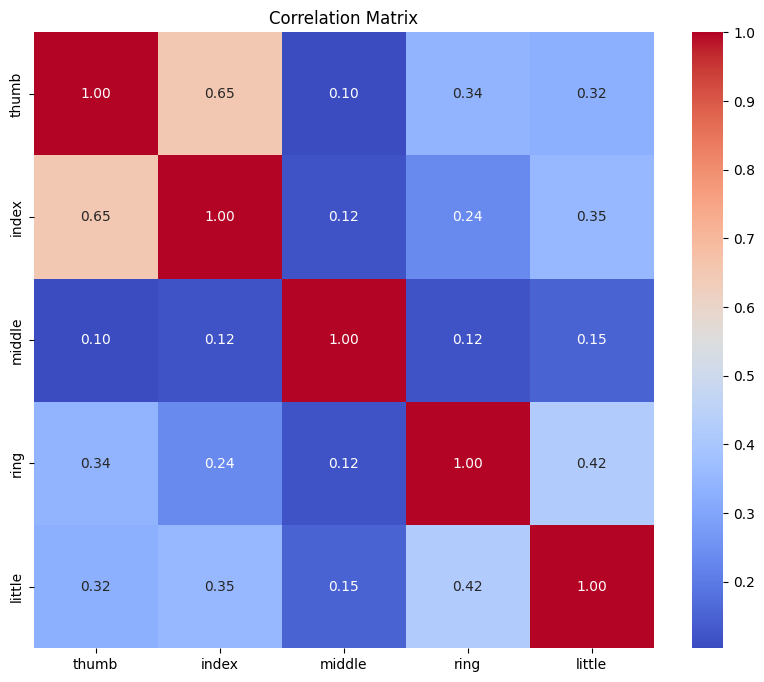

In [ ]:
# Features (finger positions)
X = df.iloc[:, :5]

# Correlation Matrix
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Feature importance

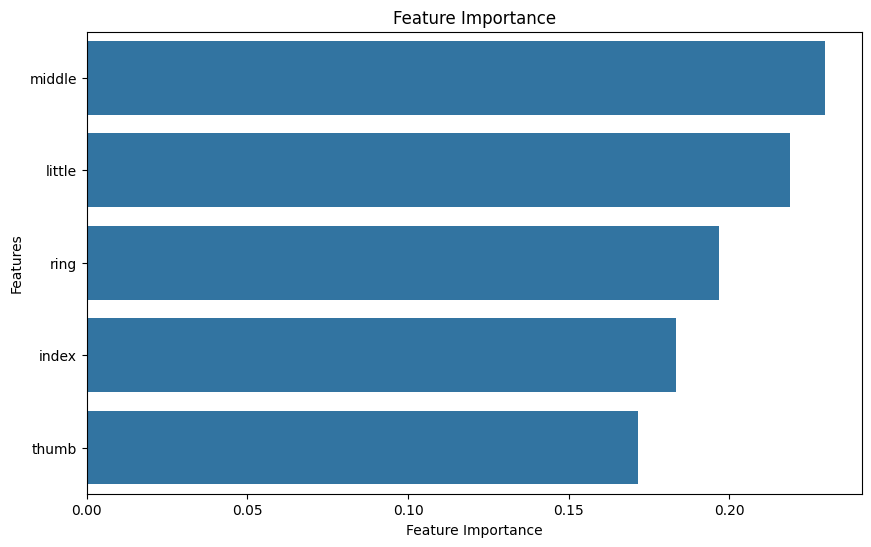

In [ ]:
# Feature Importance
X = df.drop(columns=['label'])  # Assuming 'target_column' is the column you want to predict
y = df['label']
rf = RandomForestClassifier()  # You can use any model here
rf.fit(X, y)
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

## Histogram class distribution

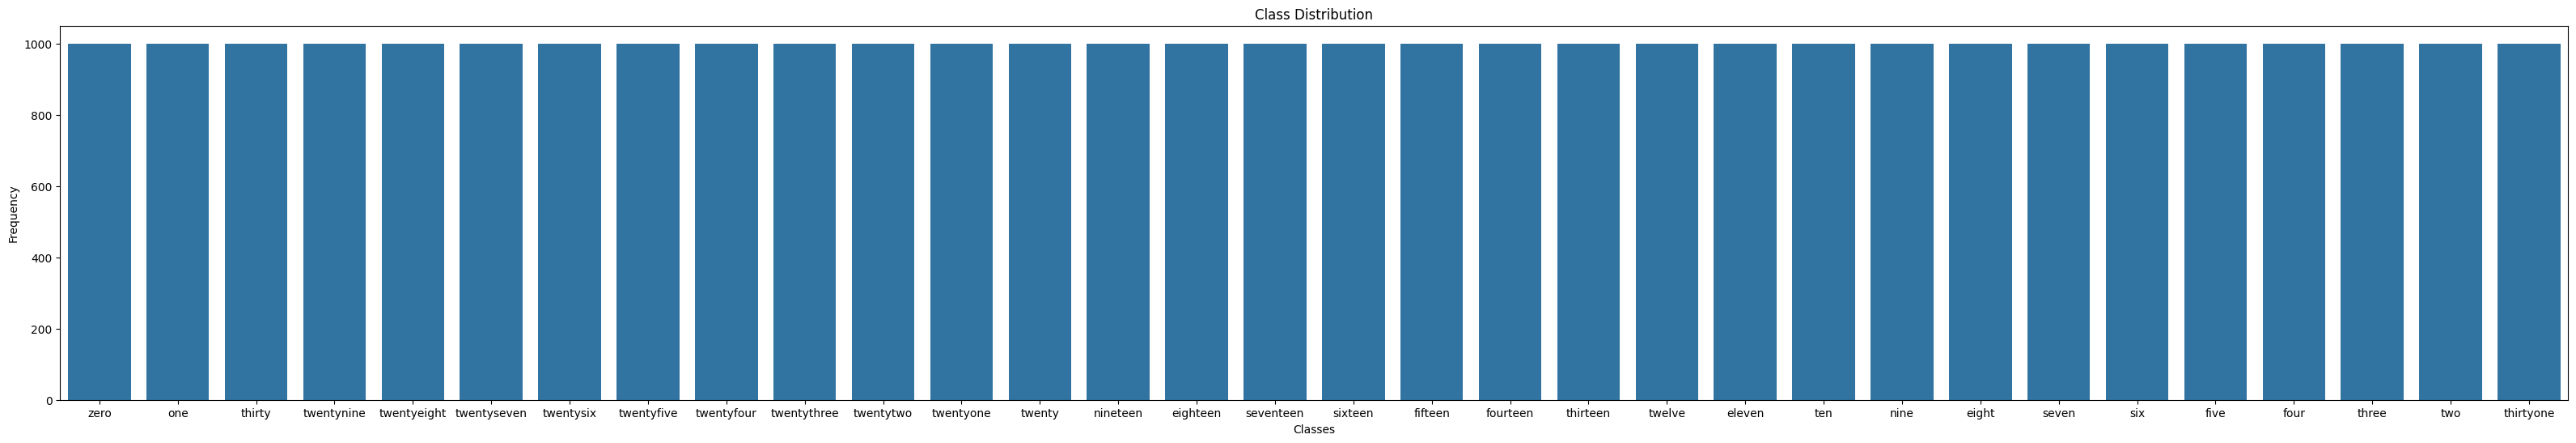

In [ ]:
# Class Distribution
class_distribution = df['label'].value_counts()
plt.figure(figsize=(40, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

## Histogram for Spread of Values

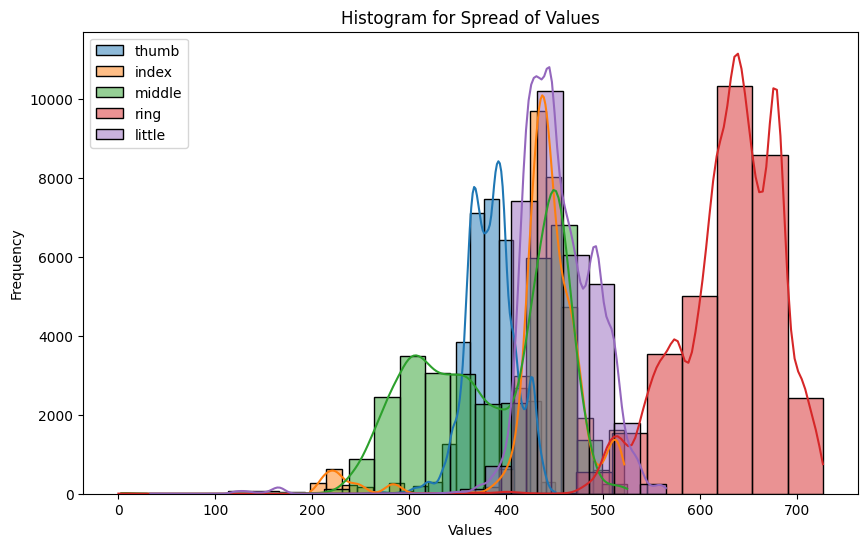

In [ ]:
# Histogram for Spread of Values
plt.figure(figsize=(10, 6))
for col in df.columns[:-1]:  # Assuming the last column is the target column
    sns.histplot(df[col], bins=20, kde=True, alpha=0.5, label=col)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram for Spread of Values')
plt.legend()
plt.show()

## Cluster Analysis (Example with KMeans)

### Index and thumb

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


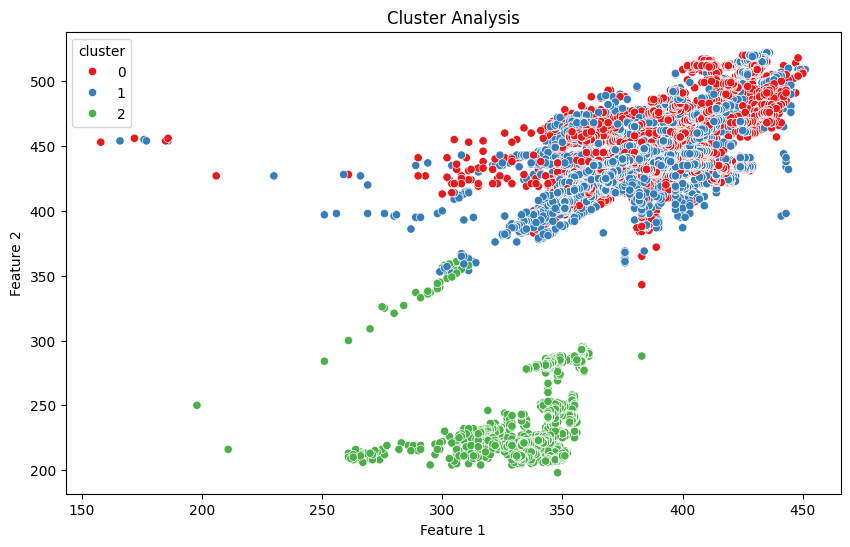

In [ ]:
from sklearn.cluster import KMeans

# Cluster Analysis (Example with KMeans)
X = df.drop(columns=['label'])

# Choose the number of clusters (k) based on your dataset
k = 3

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='thumb', y='index', hue='cluster', data=df, palette='Set1', legend='full')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Analysis')
plt.show()

### thumb and middle

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


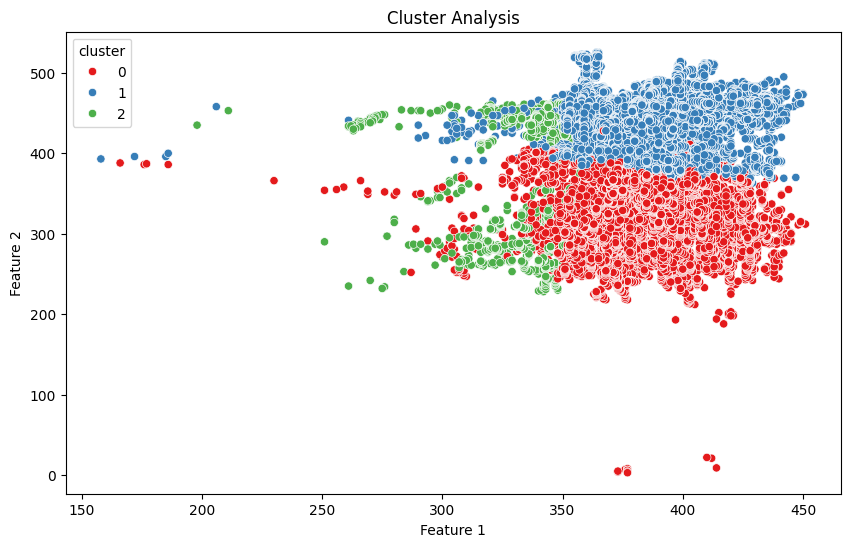

In [ ]:
from sklearn.cluster import KMeans

# Cluster Analysis (Example with KMeans)
X = df.drop(columns=['label'])

# Choose the number of clusters (k) based on your dataset
k = 3

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='thumb', y='middle', hue='cluster', data=df, palette='Set1', legend='full')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Analysis')
plt.show()

### middle and ring

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


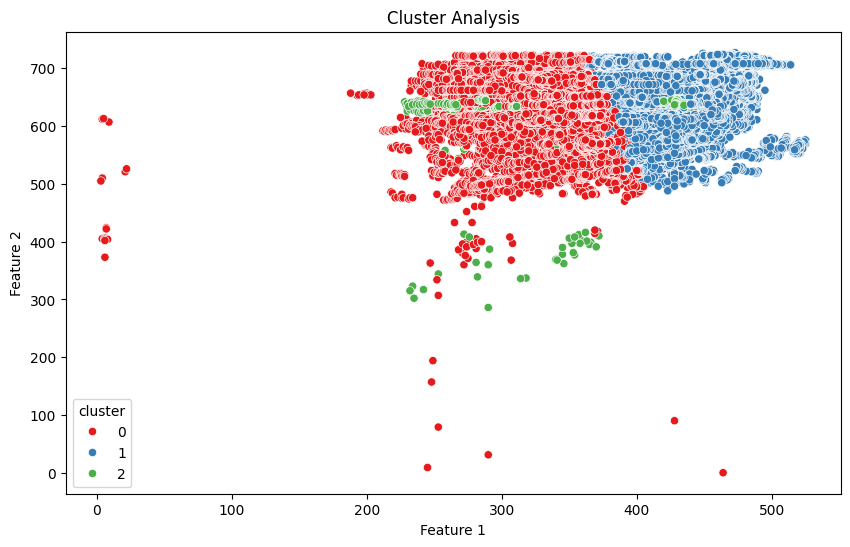

In [ ]:
from sklearn.cluster import KMeans

# Cluster Analysis (Example with KMeans)
X = df.drop(columns=['label'])

# Choose the number of clusters (k) based on your dataset
k = 3

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='middle', y='ring', hue='cluster', data=df, palette='Set1', legend='full')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Analysis')
plt.show()

### ring and little

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


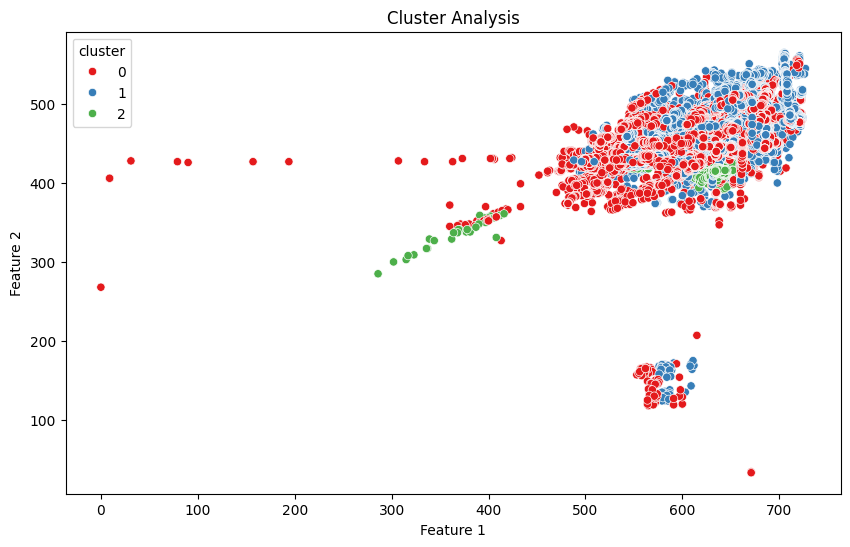

In [ ]:
from sklearn.cluster import KMeans

# Cluster Analysis (Example with KMeans)
X = df.drop(columns=['label'])

# Choose the number of clusters (k) based on your dataset
k = 3

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ring', y='little', hue='cluster', data=df, palette='Set1', legend='full')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Analysis')
plt.show()

## PCA and t-SNE analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error

# Extract features and target
X = df.drop(columns=['label'])
y = df['label']

# PCA
pca = PCA(n_components=3, whiten=True, svd_solver='auto')
X_pca = pca.fit_transform(X)

# Incremental PCA
n_components = 3
batch_size = 1000
ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size)

# Fit the PCA models to your data
X_pca = pca.fit_transform(X)
X_ipca = ipca.fit_transform(X)

# PCA
# Compute explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Compute cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Compute reconstruction error
X_reconstructed = pca.inverse_transform(pca.transform(X))
reconstruction_error = mean_squared_error(X, X_reconstructed)

print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Explained Variance Ratio:", cumulative_explained_variance_ratio)
print("Reconstruction Error:", reconstruction_error)

# Visualize PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', legend='full')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

# ICPA
# Compute explained variance ratio
explained_variance_ratio = ipca.explained_variance_ratio_

# Compute cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Compute reconstruction error
X_reconstructed = ipca.inverse_transform(ipca.transform(X))
reconstruction_error = mean_squared_error(X, X_reconstructed)

print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Explained Variance Ratio:", cumulative_explained_variance_ratio)
print("Reconstruction Error:", reconstruction_error)

# Visualize PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_ipca[:, 0], y=X_ipca[:, 1], hue=y, palette='Set1', legend='full')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()


Explained Variance Ratio: [0.42607173 0.29524229 0.16972767]
Cumulative Explained Variance Ratio: [0.42607173 0.72131403 0.8910417 ]
Reconstruction Error: 270.51219421074813


#ML models

##MLP model

### Dataset preparation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import precision_score, recall_score, f1_score


# Features (finger positions)
X = df.iloc[:, :5]

# Target variable (single column with string values representing classes)
y_str = df['label'].astype(str)  # Convert labels to string
class_labels = y_str.unique()

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_str)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


### Model building, training

In [ ]:
# Build a deep neural network with increased units in the layers
model = Sequential()
model.add(Dense(units=4096, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=2048, activation='relu'))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=len(np.unique(y)), activation='softmax'))

# Compile the model with categorical crossentropy loss
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Learning rate scheduler
def lr_schedule(epoch):
    initial_lr = 0.0001
    lr = initial_lr
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

#model summary
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)


Epoch 1/100
140/140 [==============================] - 72s 473ms/step - loss: 3.0868 - accuracy: 0.0577 - val_loss: 2.9332 - val_accuracy: 0.0658
Epoch 2/100
140/140 [==============================] - 67s 479ms/step - loss: 2.9164 - accuracy: 0.0611 - val_loss: 2.9069 - val_accuracy: 0.0580
Epoch 3/100
140/140 [==============================] - 66s 475ms/step - loss: 2.9011 - accuracy: 0.0637 - val_loss: 2.8840 - val_accuracy: 0.0632
Epoch 4/100
140/140 [==============================] - 66s 469ms/step - loss: 2.8910 - accuracy: 0.0670 - val_loss: 2.9009 - val_accuracy: 0.0621
Epoch 5/100
140/140 [==============================] - 65s 463ms/step - loss: 2.8741 - accuracy: 0.0721 - val_loss: 2.9286 - val_accuracy: 0.0801
Epoch 6/100
140/140 [==============================] - 67s 476ms/step - loss: 2.8483 - accuracy: 0.0847 - val_loss: 2.8494 - val_accuracy: 0.1029
Epoch 7/100
140/140 [==============================] - 67s 481ms/step - loss: 2.8152 - accuracy: 0.0987 - val_loss: 2.8141 -

###Predict and evaluate on test data

In [ ]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Predictions on the test set
predictions = model.predict(X_test)
predictions_classes = np.argmax(predictions, axis=1)

# Assuming multi-class classification, you can calculate precision, recall, and F1 score as follows:
precision = precision_score(y_test, predictions_classes, average='weighted')
recall = recall_score(y_test, predictions_classes, average='weighted')
f1 = f1_score(y_test, predictions_classes, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions_classes)

# Create a heatmap without annotations
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=False, cmap="YlOrRd", fmt=".2f", xticklabels=class_labels, yticklabels=class_labels)
plt.title(f'Confusion Matrix - MLP based model', fontsize=24)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('True', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
plt.close()

from sklearn.metrics import classification_report

# Generate a classification report
class_report = classification_report(y_test, predictions_classes, target_names=class_labels)
# Print the classification report
print("Classification Report:")
print(class_report)


300/300 [==============================] - 8s 27ms/step
Precision: 0.78
Recall: 0.78
F1 Score: 0.78
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4096)              24576     
                                                                 
 dense_1 (Dense)             (None, 2048)              8390656   
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                      

In [ ]:
!pip install skl2onnx
!pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.5/298.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.6 MB/s eta 0:00:00


##Other models

###Training

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import matplotlib.pyplot as plt

# Replace 'your_encoded_data_file.xlsx' with the actual file path
encoded_data_file_path = '/content/drive/MyDrive/Copy of concatenated_data_text_as_label.xlsx'  # Replace with your actual file path

# Read the Excel file into a DataFrame
df = pd.read_excel(encoded_data_file_path)

# Features (finger positions)
X = df.iloc[:, :5]

# Target variable (single column with string values representing classes)
y_str = df['label'].astype(str)  # Convert labels to string
class_labels = y_str.unique()

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_str)

# Normalize the data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Initialize models with adjusted parameters
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=1, min_samples_split=2), n_estimators=200, random_state=42)
extra_trees_classifier = ExtraTreesClassifier(n_estimators=200, min_samples_leaf=1, min_samples_split=2, random_state=42)
random_forest_classifier = RandomForestClassifier(n_estimators=200, min_samples_leaf=1, min_samples_split=2, random_state=42)
decision_tree_classifier = DecisionTreeClassifier(min_samples_leaf=1, min_samples_split=2, random_state=42)
knn_classifier = KNeighborsClassifier()

# Train models
bagging_classifier.fit(X_train, y_train)
extra_trees_classifier.fit(X_train, y_train)
random_forest_classifier.fit(X_train, y_train)
decision_tree_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


KNeighborsClassifier()

In [ ]:
# Parameters of each model

print("Bagging classifier parameters - ", bagging_classifier.get_params())
print("Extra trees classifier parameters - ",extra_trees_classifier.get_params())
print("Random Forest classifier parameters - ",random_forest_classifier.get_params())
print("Decision tree classifier parameters - ",decision_tree_classifier.get_params())
print("KNN classifier parameters - ", knn_classifier.get_params())

Bagging classifier parameters -  {'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(), 'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Extra trees classifier parameters -  {'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 

###Evaluating

Model: Bagging Classifier
Accuracy: 0.8940
 Precision: 0.8946
 Recall: 0.8940
 F1 Score: 0.8940

/content/drive/MyDrive/MODELS for FYP/confusion matrix


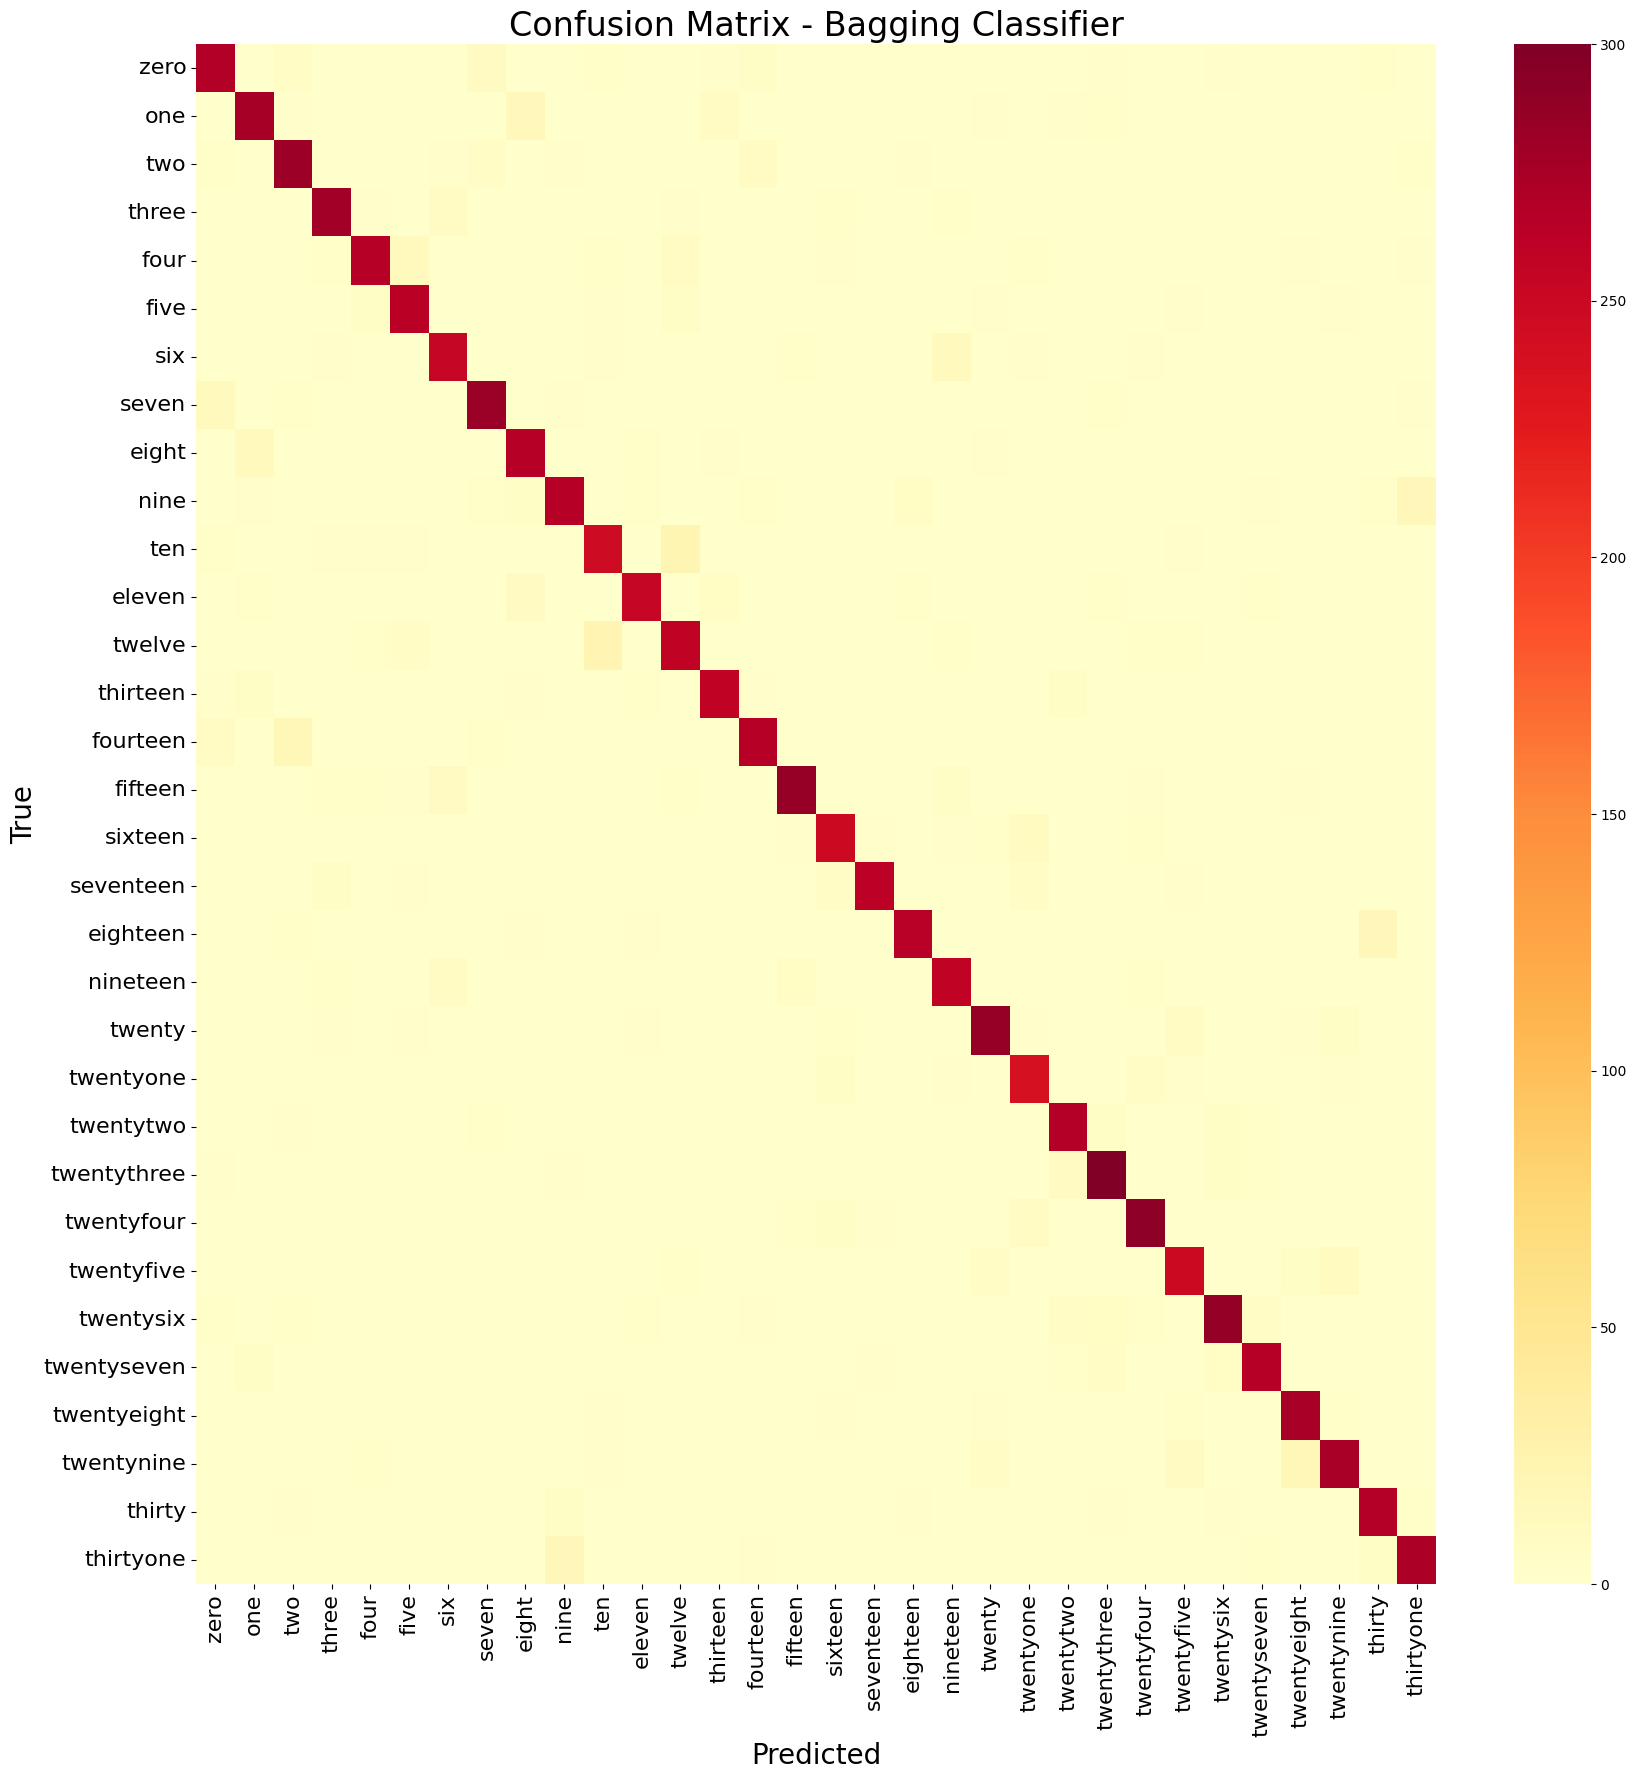

Model: Extra Trees Classifier
Accuracy: 0.9105
 Precision: 0.9110
 Recall: 0.9105
 F1 Score: 0.9105

/content/drive/MyDrive/MODELS for FYP/confusion matrix


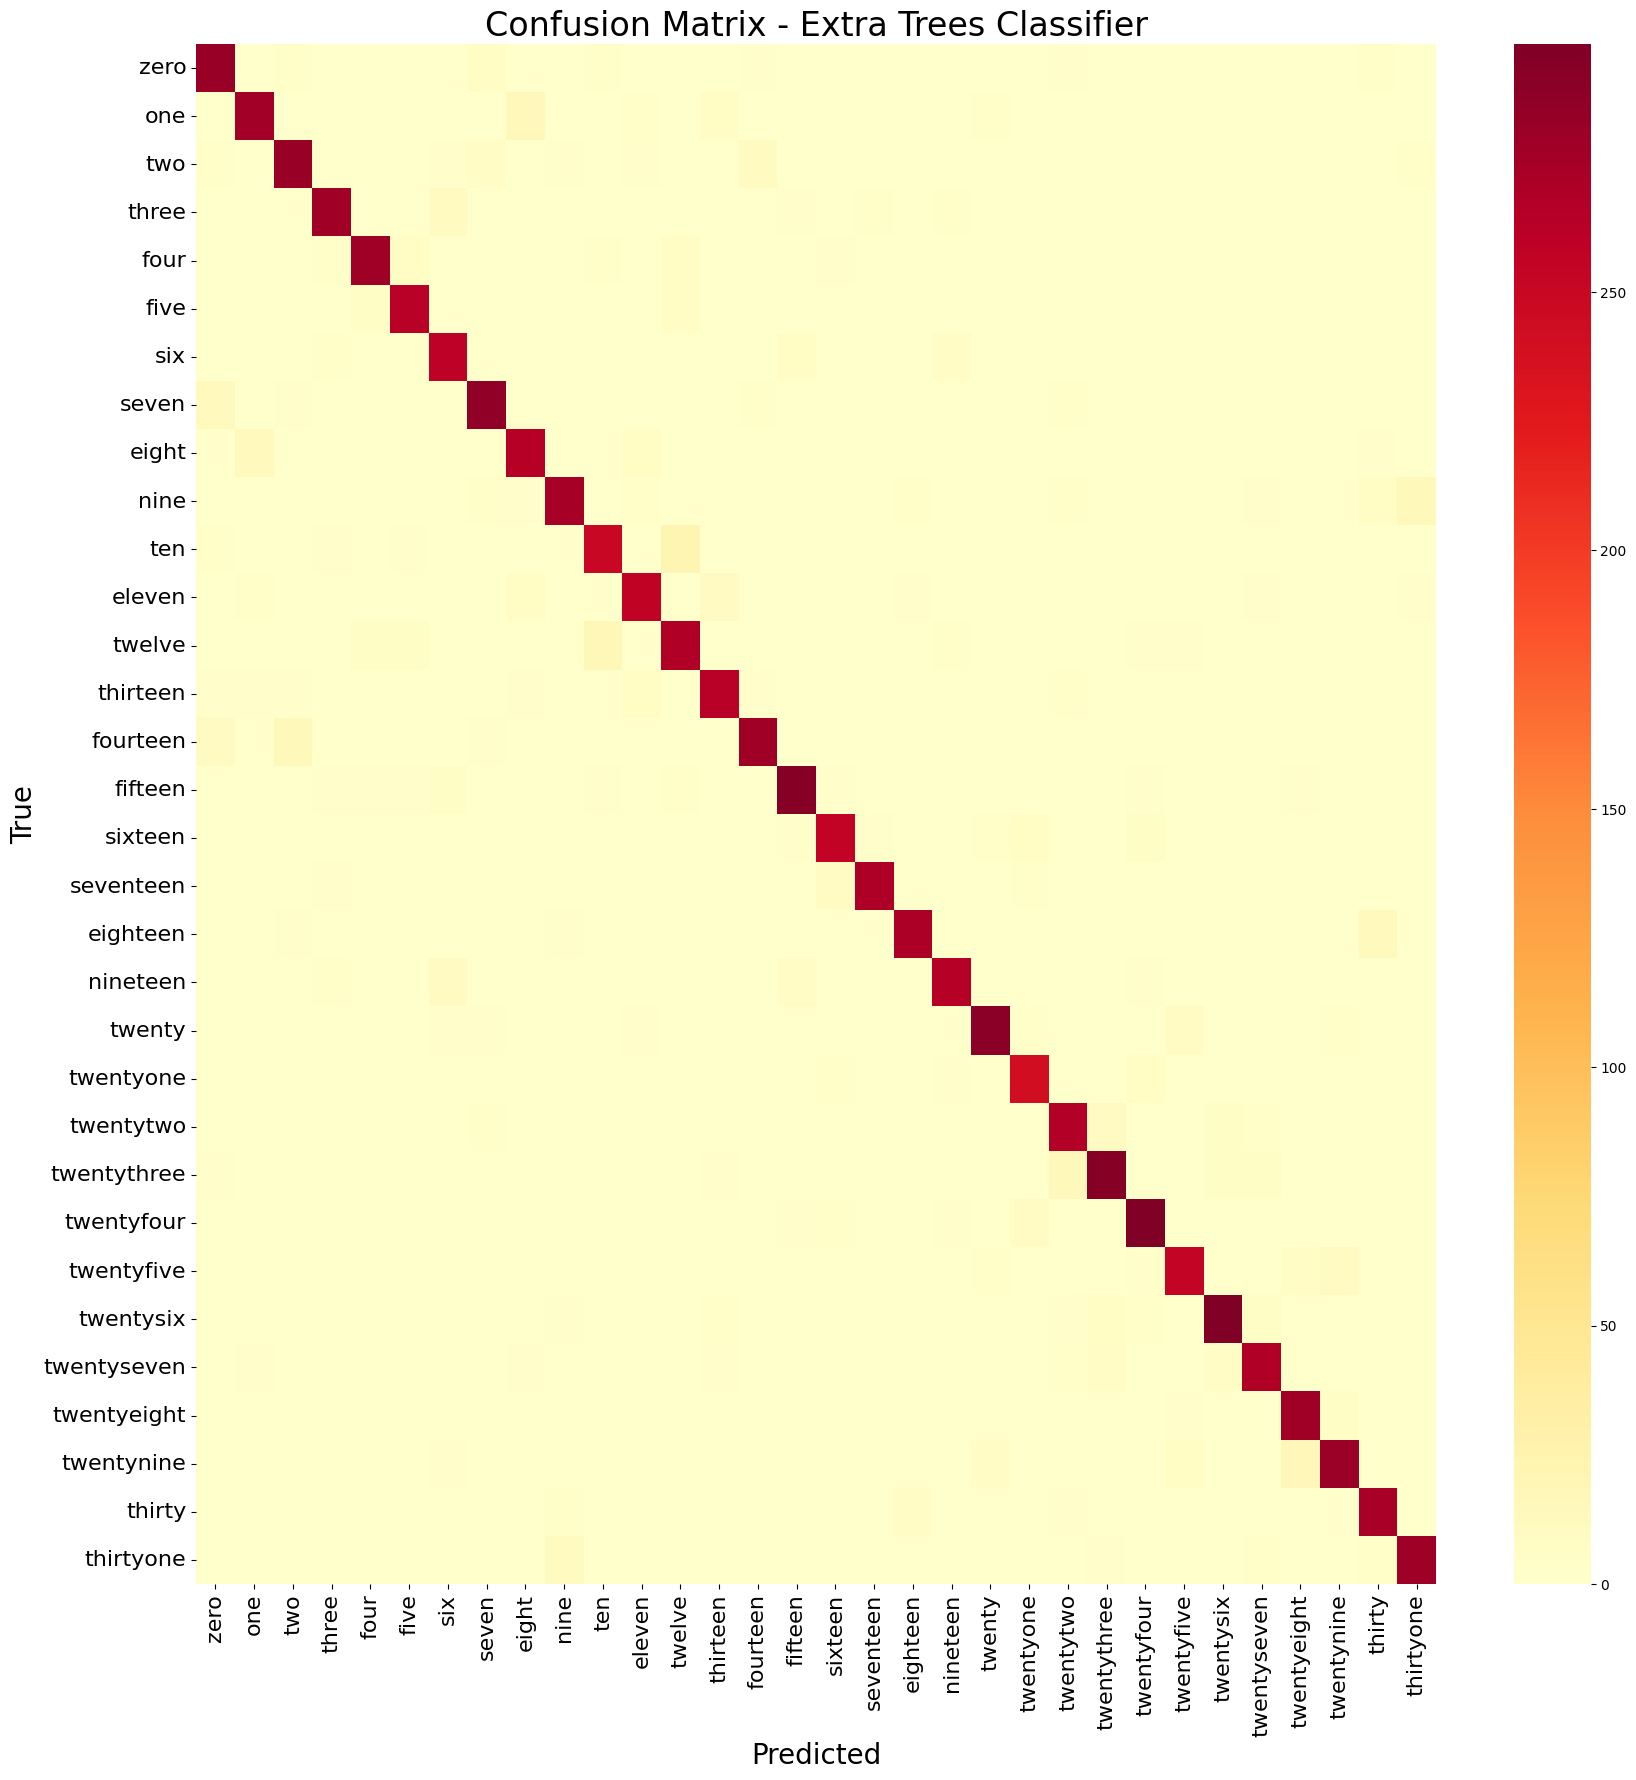

Model: Random Forest Classifier
Accuracy: 0.9017
 Precision: 0.9021
 Recall: 0.9017
 F1 Score: 0.9017

/content/drive/MyDrive/MODELS for FYP/confusion matrix


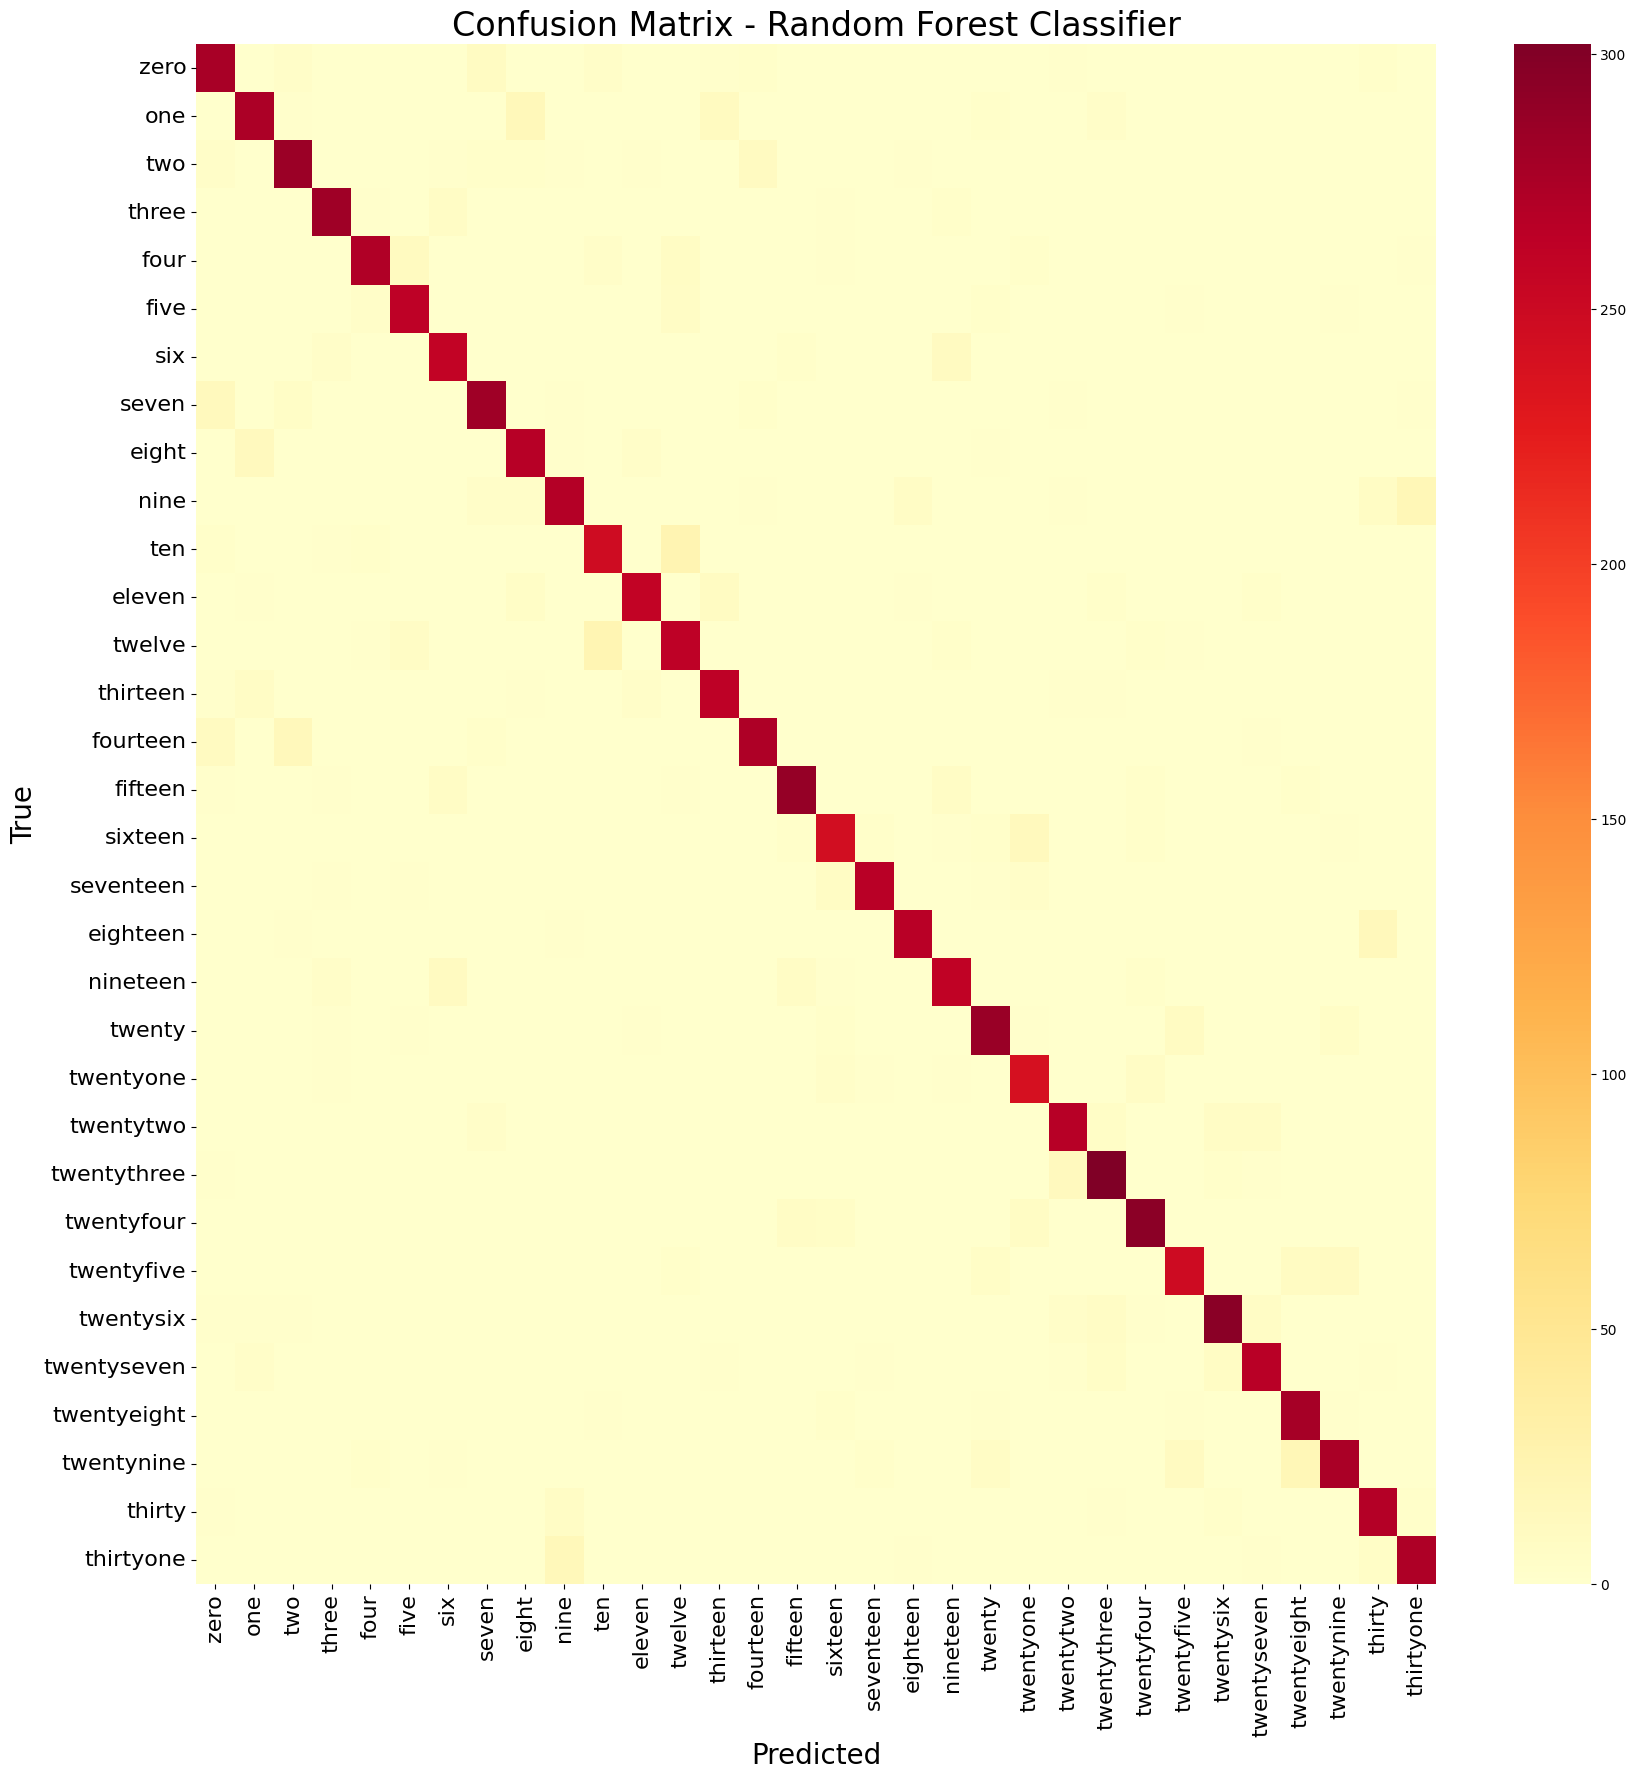

Model: Decision Tree Classifier
Accuracy: 0.8060
 Precision: 0.8069
 Recall: 0.8060
 F1 Score: 0.8061

/content/drive/MyDrive/MODELS for FYP/confusion matrix


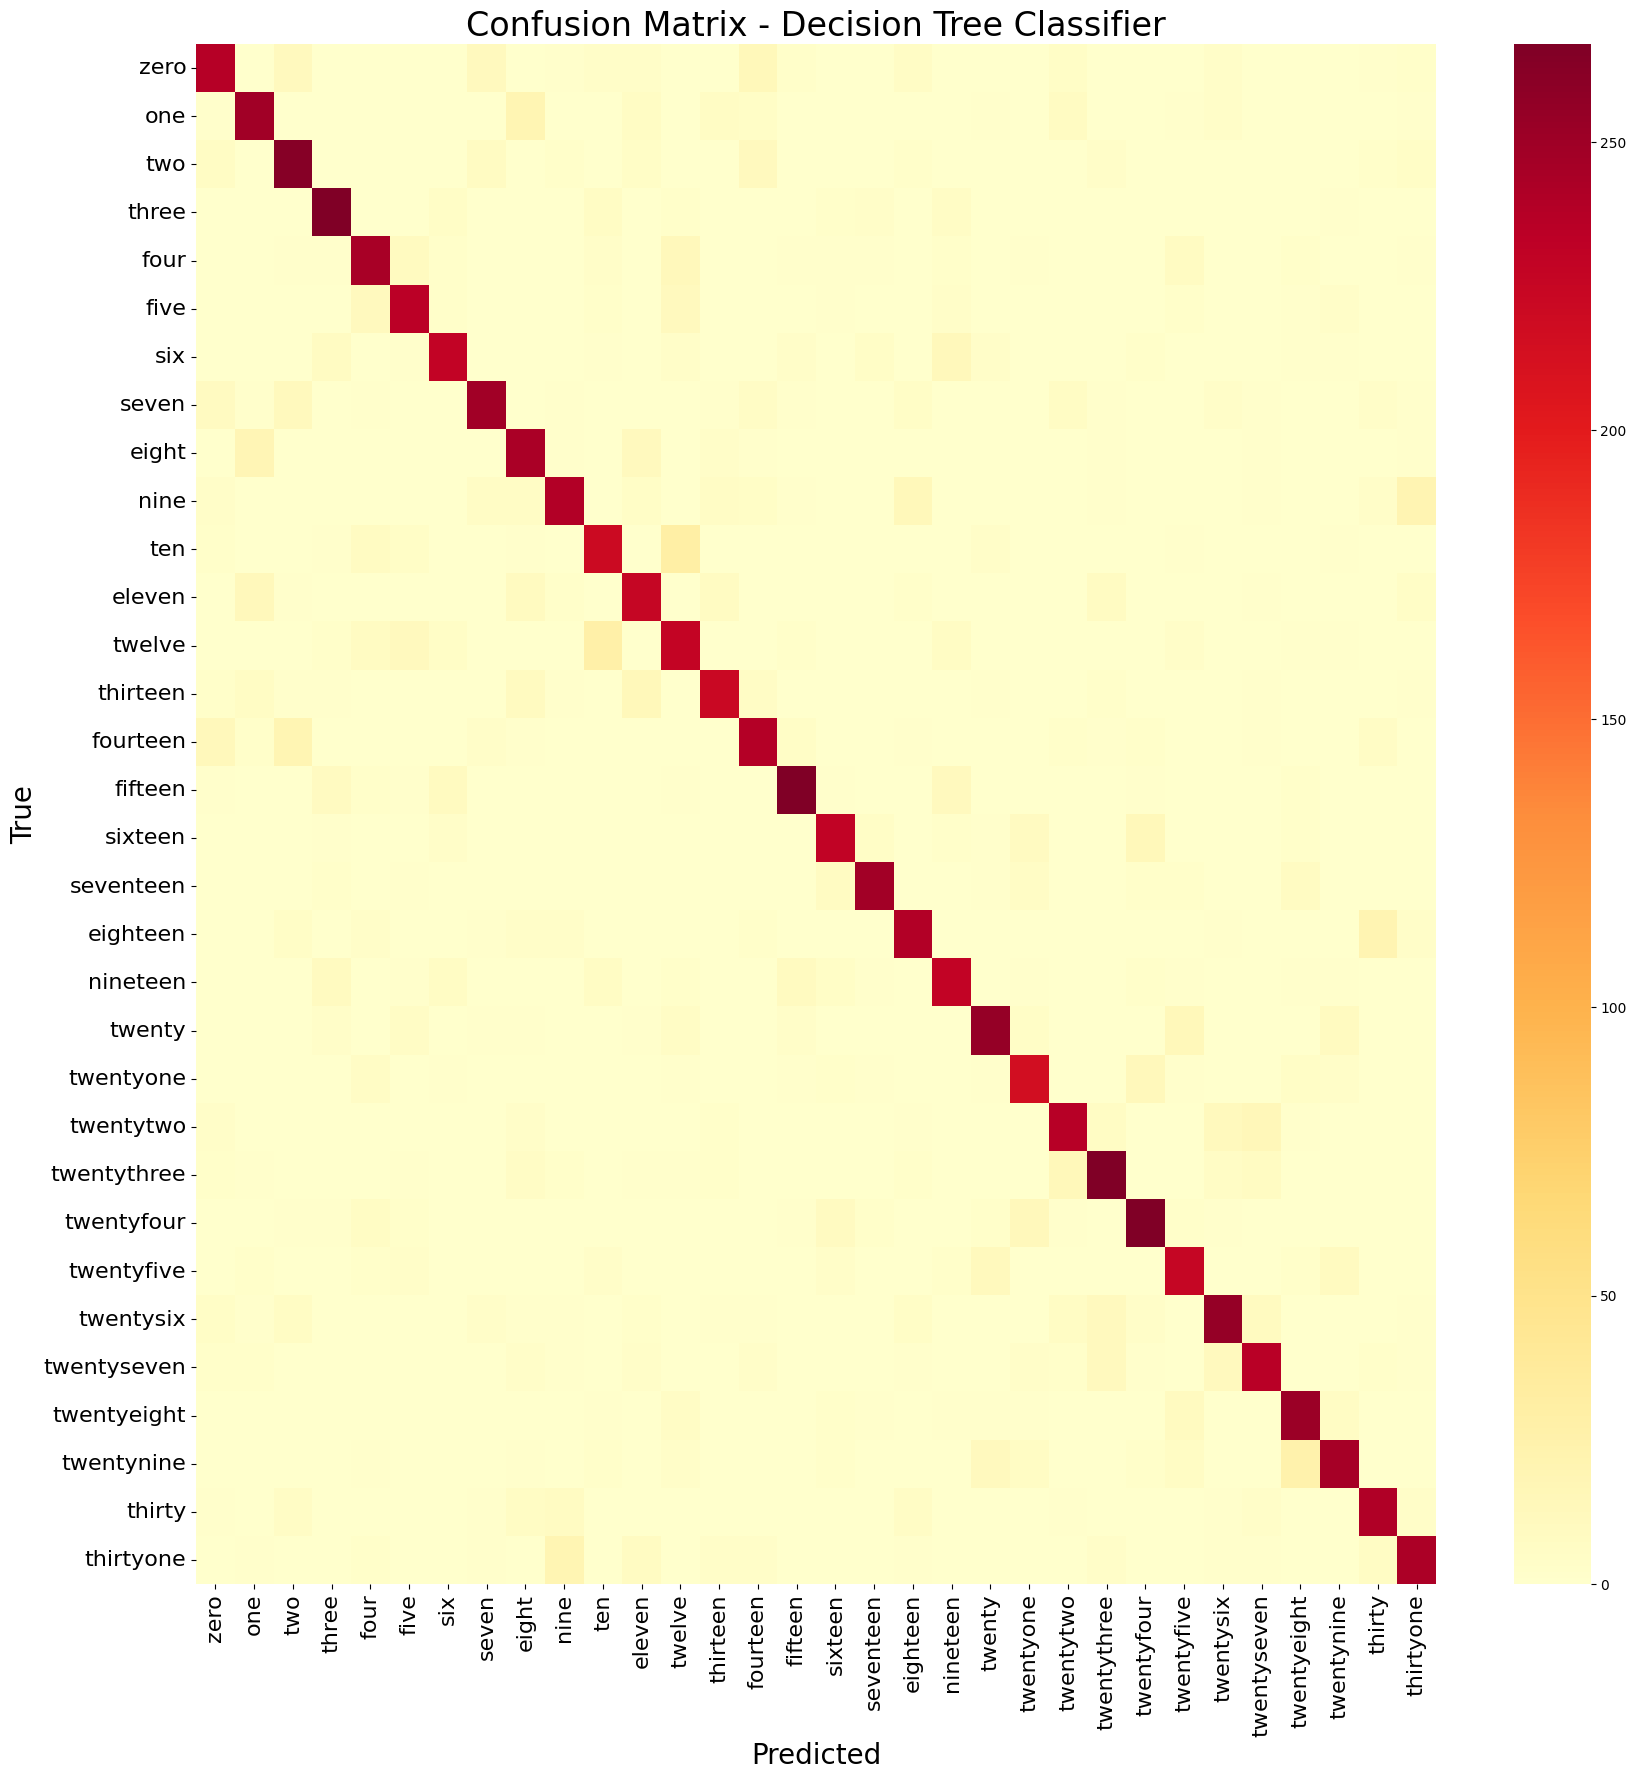

Model: KNN Classifier
Accuracy: 0.8130
 Precision: 0.8154
 Recall: 0.8130
 F1 Score: 0.8132

/content/drive/MyDrive/MODELS for FYP/confusion matrix


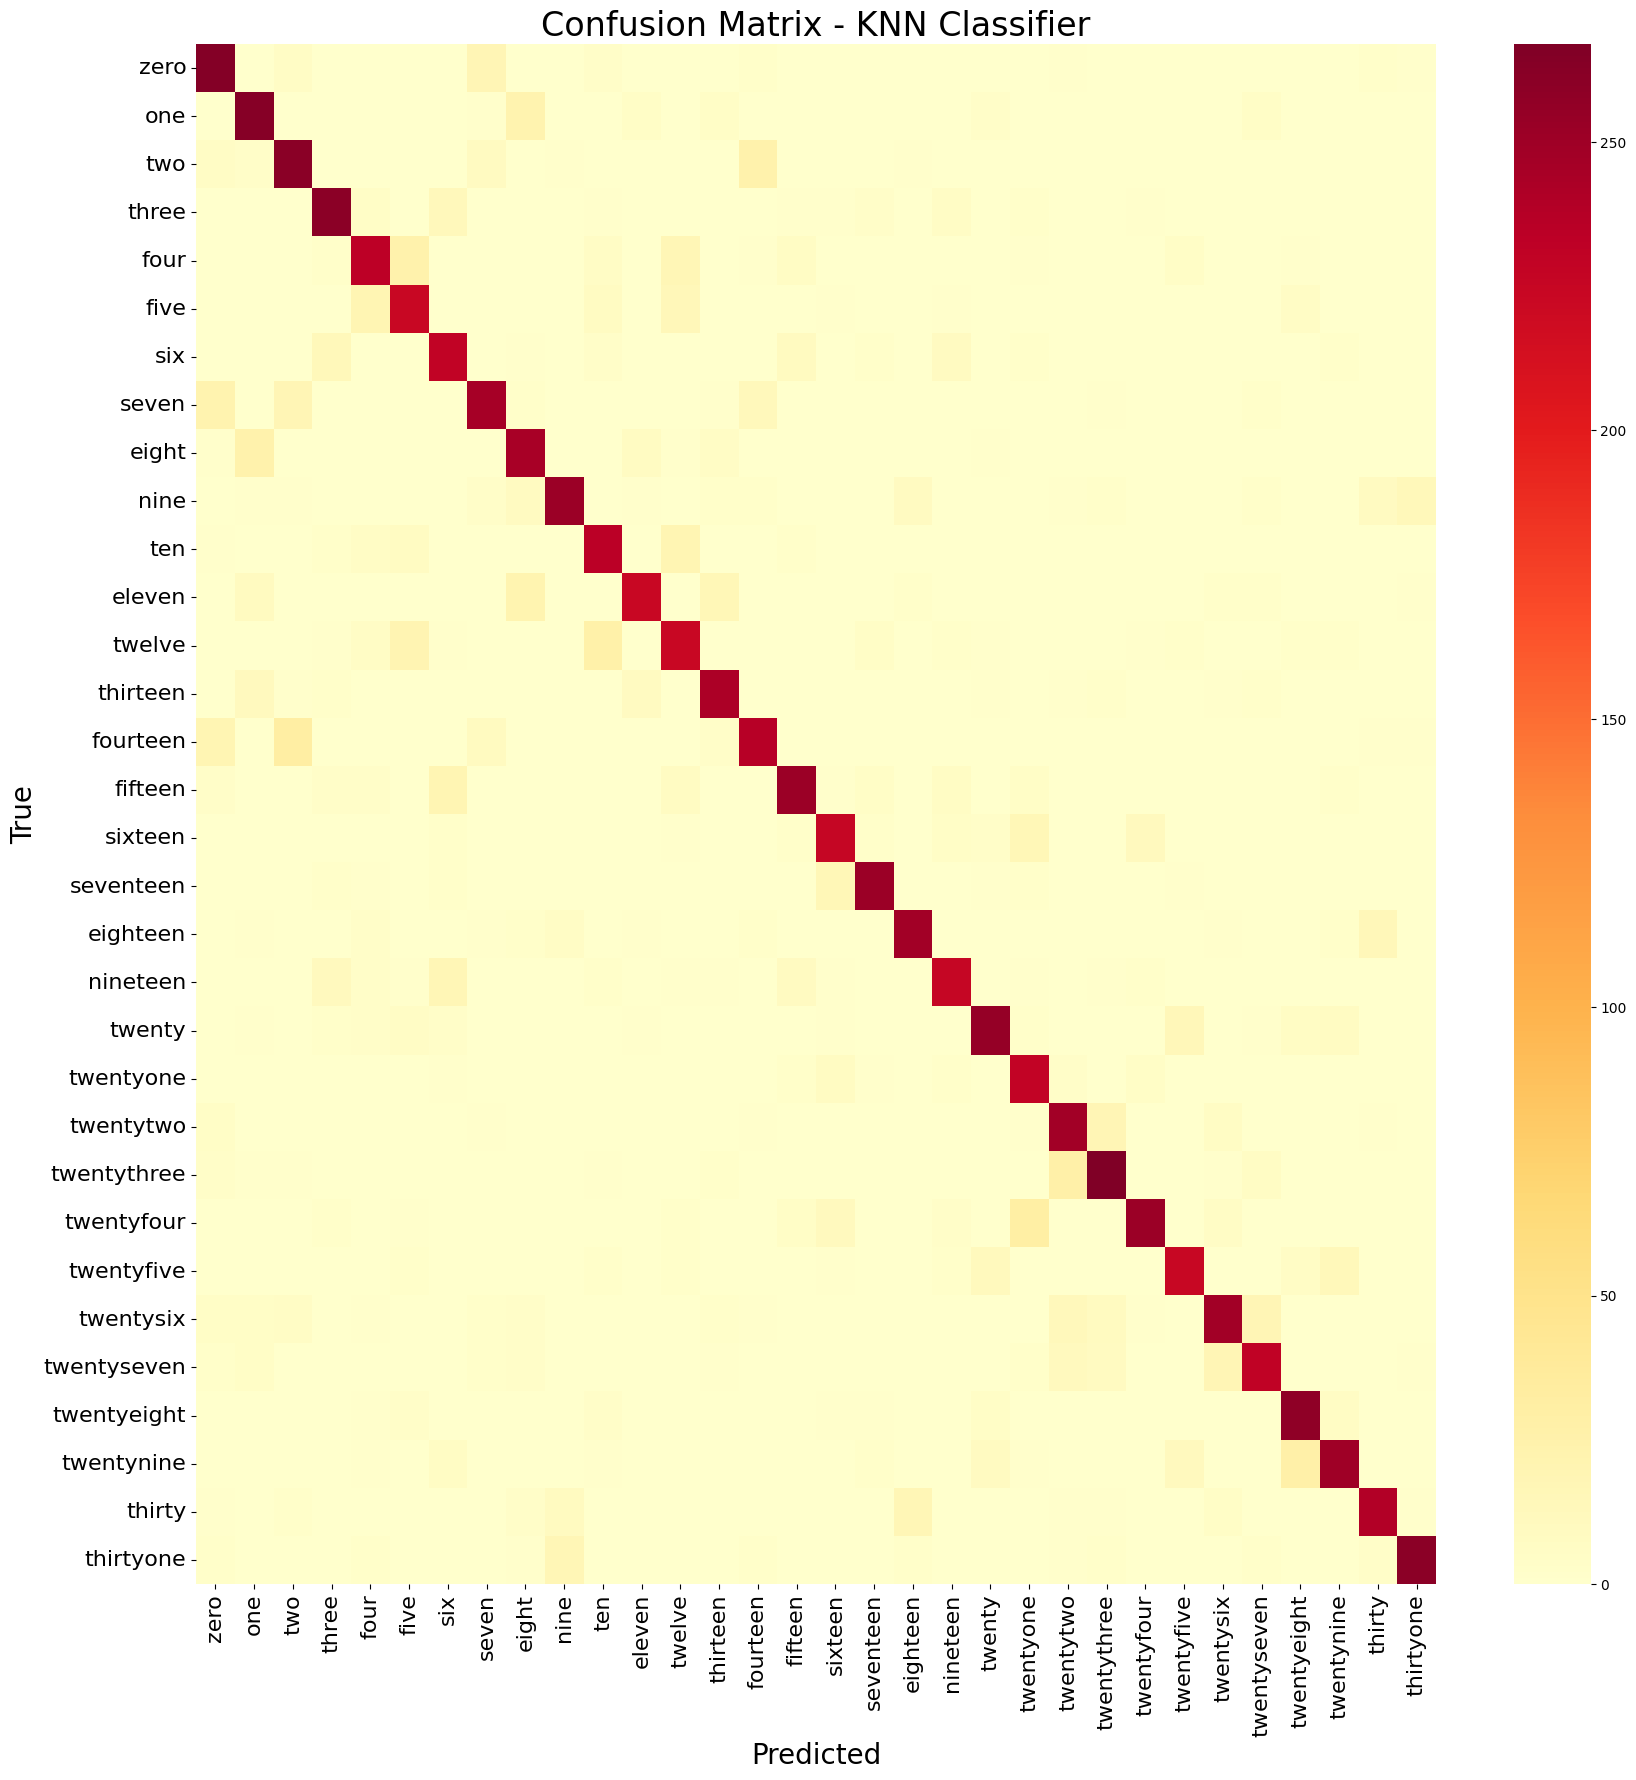

In [ ]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f" Precision: {precision:.4f}")
    print(f" Recall: {recall:.4f}")
    print(f" F1 Score: {f1:.4f}")
    print()

    # Plot confusion matrix
    %cd "/content/drive/MyDrive/MODELS for FYP/confusion matrix"

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap without annotations
    plt.figure(figsize=(20, 20))
    sns.heatmap(cm, annot=False, cmap="YlOrRd", fmt=".2f", xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix - {model_name}', fontsize=24)
    plt.xlabel('Predicted', fontsize=20)
    plt.ylabel('True', fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()
    plt.savefig(f'confusion_matrix_{model_name}.png')
    plt.close()


    # Print classification report
    #report = classification_report(y_test, y_pred, target_names=class_labels)
    #print(report)

# Evaluate and print metrics for each model
evaluate_model(bagging_classifier, X_test, y_test, "Bagging Classifier")
evaluate_model(extra_trees_classifier, X_test, y_test, "Extra Trees Classifier")
evaluate_model(random_forest_classifier, X_test, y_test, "Random Forest Classifier")
evaluate_model(decision_tree_classifier, X_test, y_test, "Decision Tree Classifier")
evaluate_model(knn_classifier, X_test, y_test, "KNN Classifier")

###Saving the model in onnx format

In [ ]:
pip install joblib


In [ ]:
%cd  "/content/drive/MyDrive/MODELS for FYP"

/content/drive/MyDrive/MODELS for FYP


In [ ]:
from joblib import dump, load

dump(bagging_classifier,"bagging_classifier.joblib")
dump(extra_trees_classifier, "extra_trees_classifier.joblib")
dump(random_forest_classifier, "random_forest.joblib")
dump(decision_tree_classifier, "decision_tree.joblib")
dump(knn_classifier, "knn_classifier.joblib")

['knn_classifier.joblib']

###Prediction

In [ ]:
import joblib
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import timeit
# Load the saved models
bagging_classifier = joblib.load("/content/drive/MyDrive/MODELS for FYP/bagging_classifier.joblib")
extra_trees_classifier = joblib.load("/content/drive/MyDrive/MODELS for FYP/extra_trees_classifier.joblib")
random_forest_classifier = joblib.load("/content/drive/MyDrive/MODELS for FYP/random_forest.joblib")
decision_tree_classifier = joblib.load("/content/drive/MyDrive/MODELS for FYP/decision_tree.joblib")
knn_classifier = joblib.load("/content/drive/MyDrive/MODELS for FYP/knn_classifier.joblib")

# Example input data
input_data = [[0, 0, 0, 0, 0]]

# List of word representations of numbers from zero to thirty-one
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine',
               'ten', 'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen', 'sixteen', 'seventeen', 'eighteen', 'nineteen',
               'twenty', 'twentyone', 'twentytwo', 'twentythree', 'twentyfour', 'twentyfive', 'twentysix', 'twentyseven', 'twentyeight', 'twentynine',
               'thirty', 'thirtyone']

# Function to predict and display class name for a given model
def predict_and_display(model, model_name):
    predictions = model.predict(input_data)
    predicted_word = class_names[predictions[0]]
    print(f"{model_name} Predicted Class:", predicted_word)

# Predict and display for each model
predict_and_display(bagging_classifier, "Bagging Classifier")
predict_and_display(extra_trees_classifier, "Extra Trees Classifier")
predict_and_display(random_forest_classifier, "Random Forest Classifier")
predict_and_display(decision_tree_classifier, "Decision Tree Classifier")
predict_and_display(knn_classifier, "KNN Classifier")


Bagging Classifier Predicted Class: nineteen
Extra Trees Classifier Predicted Class: nineteen
Random Forest Classifier Predicted Class: nineteen
Decision Tree Classifier Predicted Class: nineteen
KNN Classifier Predicted Class: ten


In [ ]:
import timeit

# Function to measure the inference time for a given model
def measure_inference_time(model, model_name):
    def inference():
        predictions = model.predict(input_data)

    inference_time = timeit.timeit(inference, number=1000)  # Adjust the number of iterations as needed
    print(f"{model_name} Inference Time:", inference_time / 1000, "seconds per prediction")

# Measure inference time for each model
measure_inference_time(bagging_classifier, "Bagging Classifier")
measure_inference_time(extra_trees_classifier, "Extra Trees Classifier")
measure_inference_time(random_forest_classifier, "Random Forest Classifier")
measure_inference_time(decision_tree_classifier, "Decision Tree Classifier")
measure_inference_time(knn_classifier, "KNN Classifier")

Bagging Classifier Inference Time: 0.022540652891000035 seconds per prediction
Extra Trees Classifier Inference Time: 0.011947981276000007 seconds per prediction
Random Forest Classifier Inference Time: 0.011297019788999989 seconds per prediction
Decision Tree Classifier Inference Time: 7.298683300001584e-05 seconds per prediction
KNN Classifier Inference Time: 0.0011630527240000107 seconds per prediction


In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
